In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC


In [2]:
pwd

'C:\\Users\\Krishna Veepuru\\Documents\\Data programming-Python _KAVYA\\python class project'

In [5]:
#Reading the file
df = pd.read_csv("general_data.csv")

In [6]:
df.head()

,Age,Attrition,Business Travel,Department,distance from home,Education,Education Field,Employee count,Employee ID,Gender,...,Number of Companies Worked,Over 18 years,Percent Salary Hike,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Years At Company,Years since Last promotion,Years with Curr Manager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [7]:
df.info()
df['MaritalStatus'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4410 non-null   int64  
 1   Attrition                   4410 non-null   object 
 2   Business Travel             4410 non-null   object 
 3   Department                  4410 non-null   object 
 4   distance from home          4410 non-null   int64  
 5   Education                   4410 non-null   int64  
 6   Education Field             4410 non-null   object 
 7   Employee count              4410 non-null   int64  
 8   Employee ID                 4410 non-null   int64  
 9   Gender                      4410 non-null   object 
 10  Job level                   4410 non-null   int64  
 11  Job Role                    4410 non-null   object 
 12  Marital Status              4410 non-null   object 
 13  Monthly Income              4410 

KeyError: 'MaritalStatus'

In [8]:
#Getting the number of rows and columns
df.shape

(4410, 24)

In [9]:
df.describe()

,Age,distance from home,Education,Employee count,Employee ID,Job level,Monthly Income,Number of Companies Worked,Percent Salary Hike,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Years At Company,Years since Last promotion,Years with Curr Manager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [10]:
#Printing the first 5 rows
df.head()

,Age,Attrition,Business Travel,Department,distance from home,Education,Education Field,Employee count,Employee ID,Gender,...,Number of Companies Worked,Over 18 years,Percent Salary Hike,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Years At Company,Years since Last promotion,Years with Curr Manager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [11]:
df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

## Data Cleaning

### 1. Finding null Values in columns

In [14]:
df.isnull().sum()

Age                            0
Attrition                      0
Business Travel                0
Department                     0
distance from home             0
Education                      0
Education Field                0
Employee count                 0
Employee ID                    0
Gender                         0
Job level                      0
Job Role                       0
Marital Status                 0
Monthly Income                 0
Number of Companies Worked    19
Over 18 years                  0
Percent Salary Hike            0
Standard Hours                 0
Stock Option Level             0
Total Working Years            9
Training Times Last Year       0
Years At Company               0
Years since Last promotion     0
Years with Curr Manager        0
dtype: int64

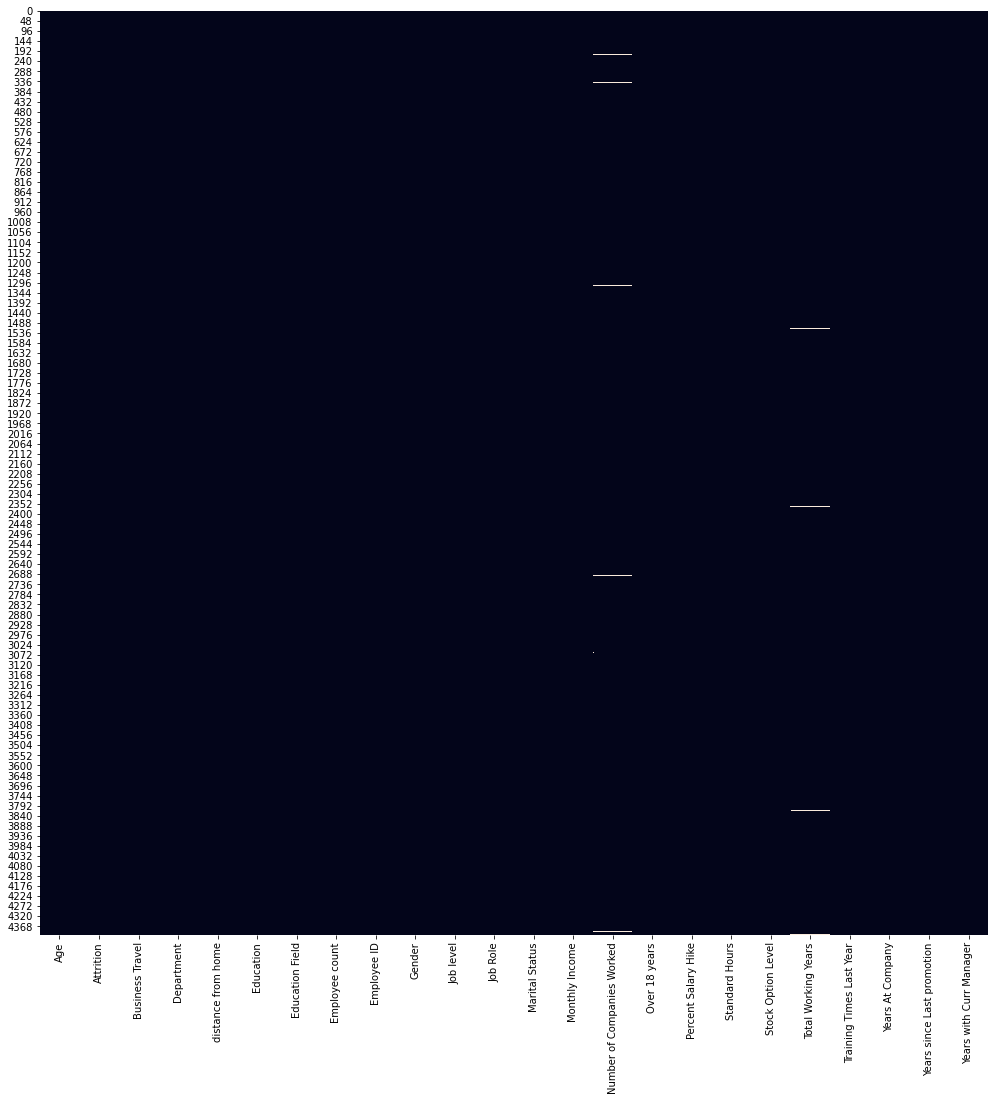

In [15]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.isnull(),cbar=False)

#### There are few null values in the columns NumCompaniesWorked and TotalWorkingYears. We wil replace the null values with the median of the column as per the best practice

In [16]:
lst=df.columns[df.isna().any()].tolist()
for i in lst:
    df[i]=df[i].replace(np.nan,df[i].median())

#### Visualizing After the null values have been replaced with the median of the column

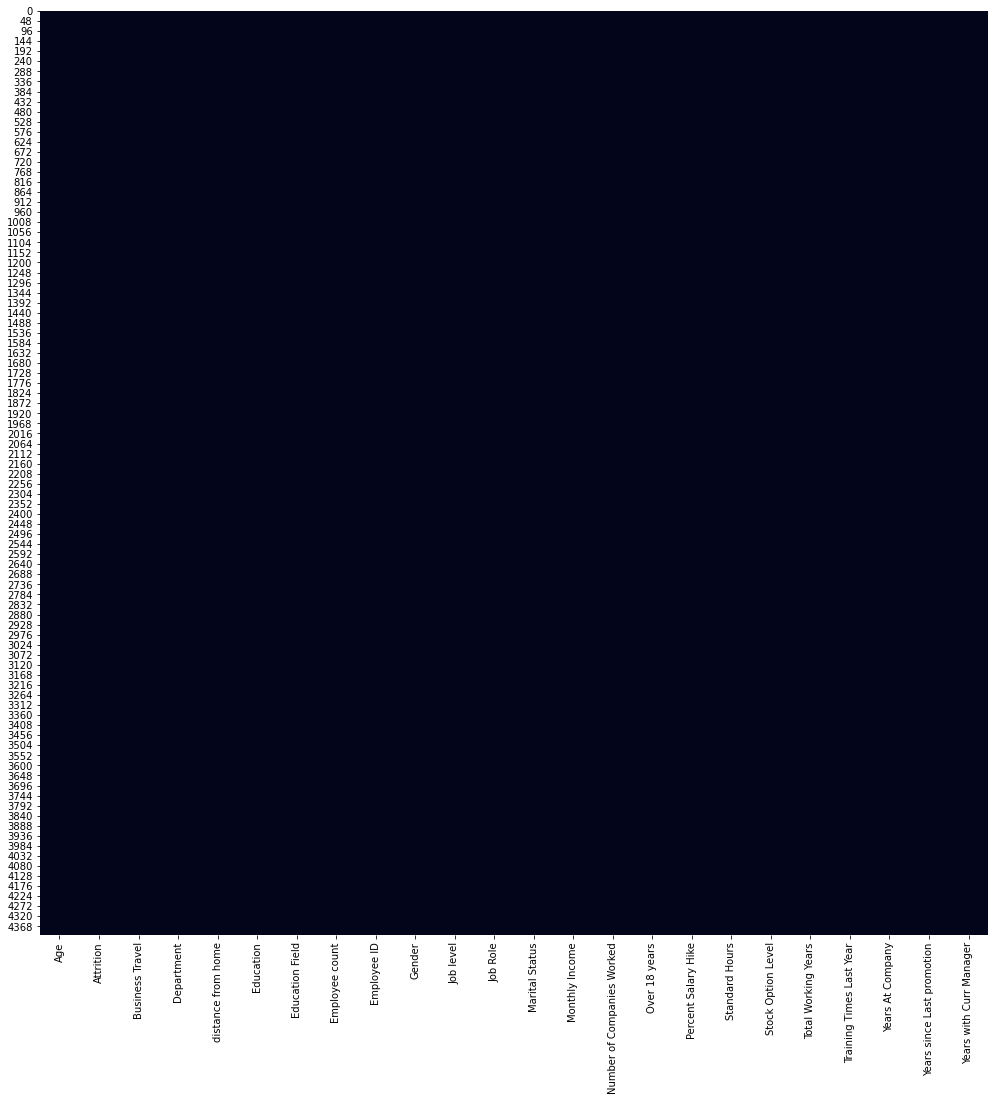

In [17]:
plt.subplots(figsize=(17,17))
sns.heatmap(df.isnull(),cbar=False)

#### Dropping columns that are not adding more value

In [22]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'] ,inplace=True)

KeyError: "['EmployeeCount' 'Over18' 'StandardHours'] not found in axis"

#### Creating a categorical column list

In [23]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['No' 'Yes']
Business Travel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
Education Field : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
Job Role : ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Marital Status : ['Married' 'Single' 'Divorced']
Over 18 years : ['Y']


In [24]:
df['Attrition'] = df.Attrition.astype("category").cat.codes


### Data Visualizations

In [25]:
df.Attrition.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

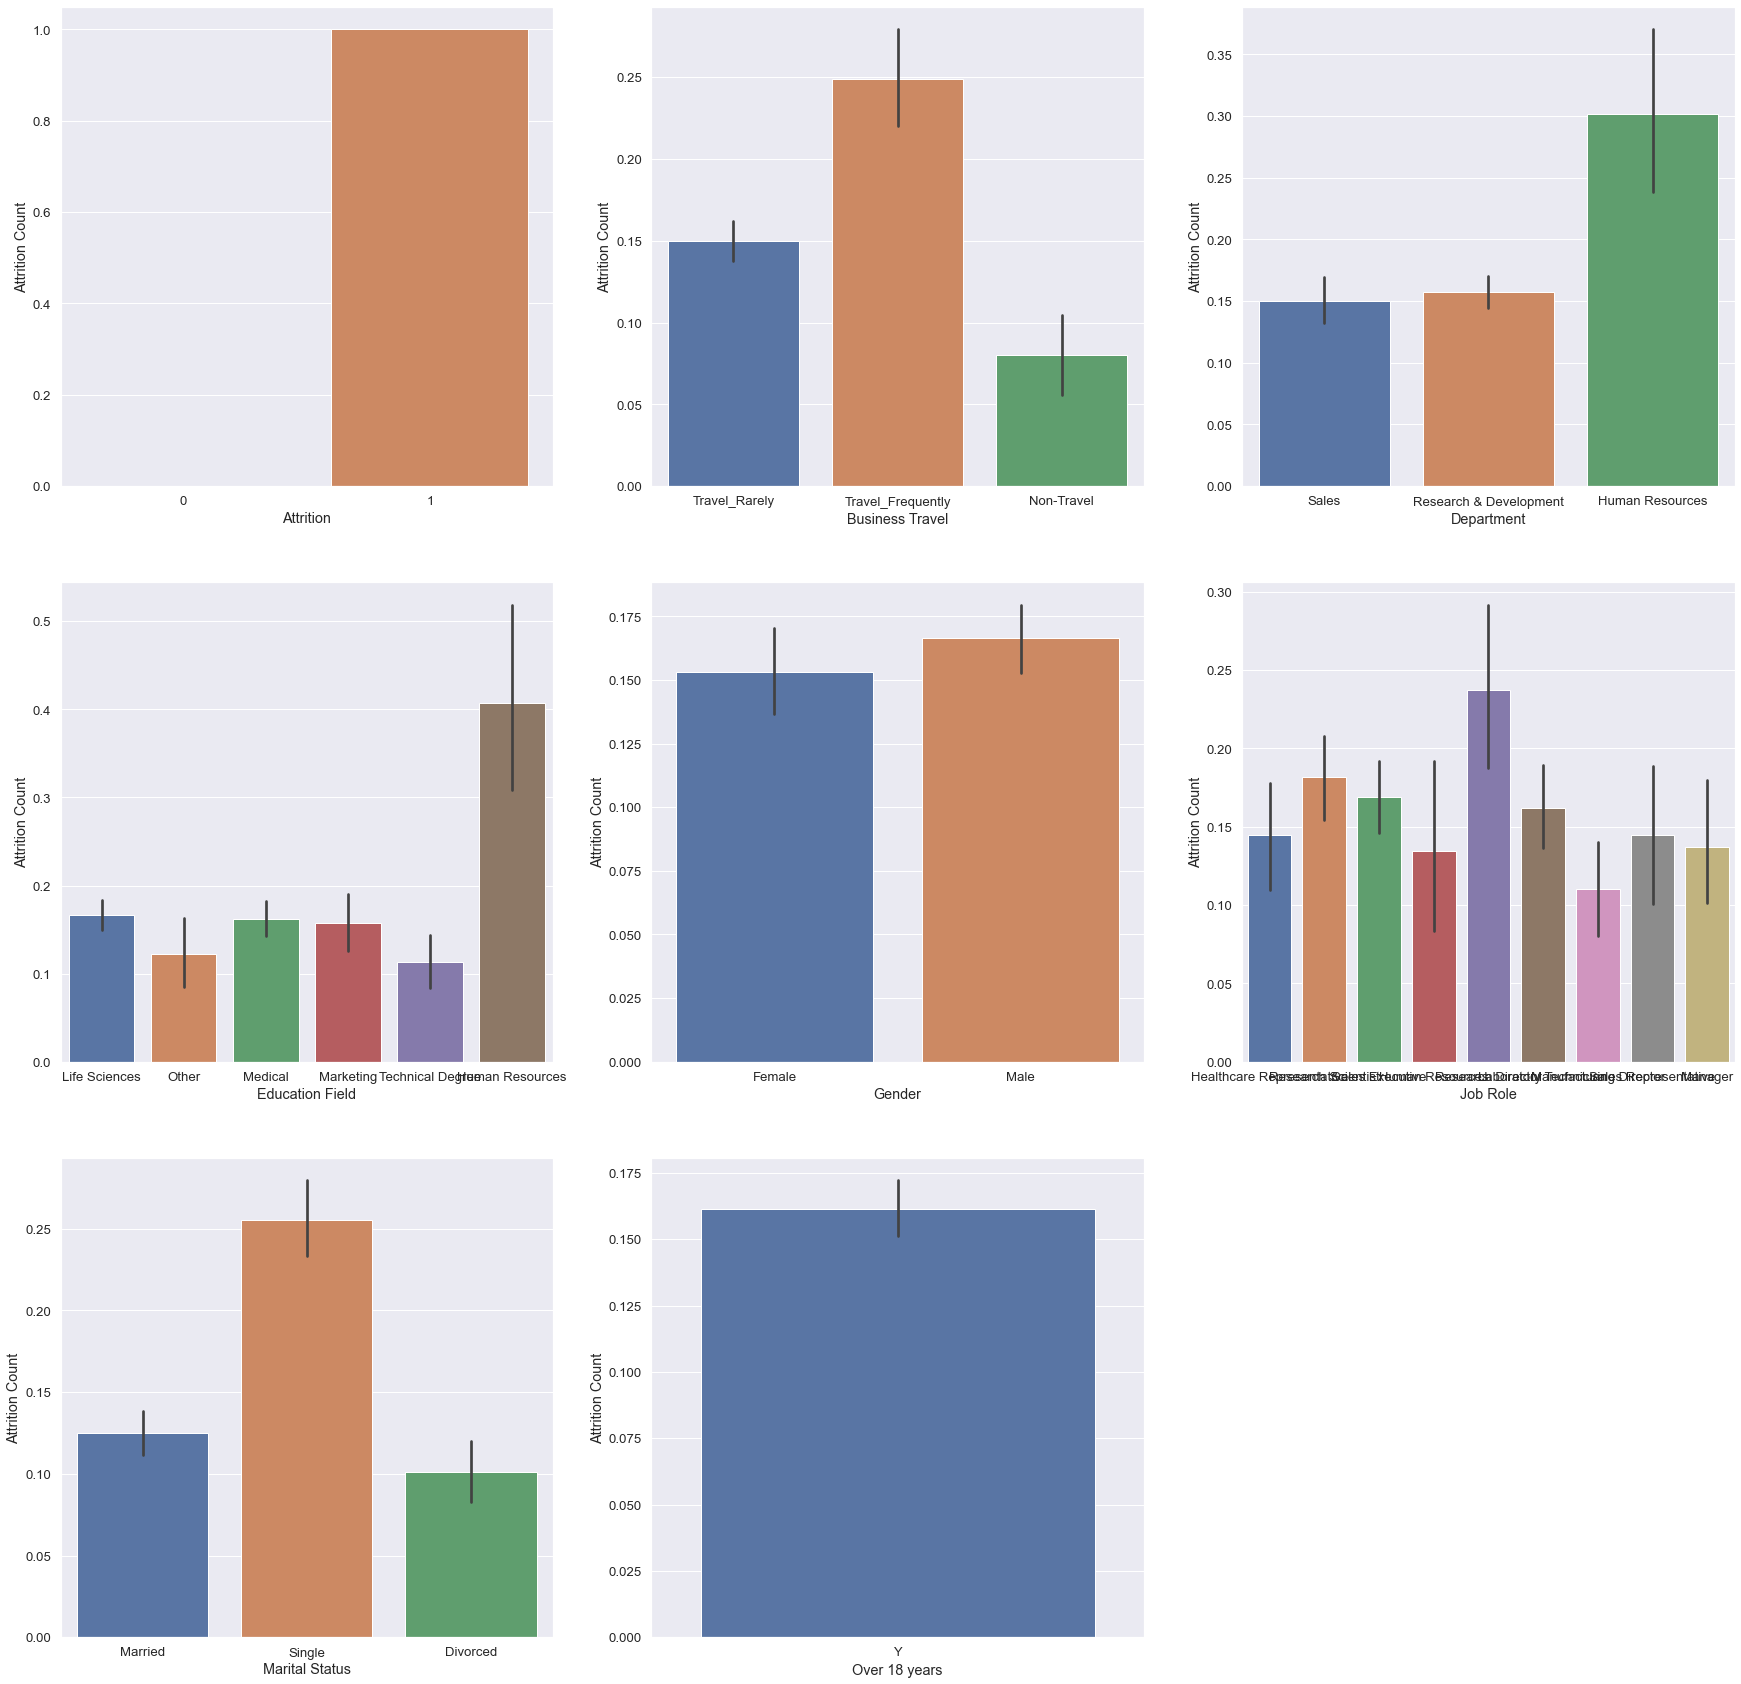

In [26]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    if column == 'JobRole' or column == 'EducationField':
        rot = 90
    else :
        rot = 0
    g.set_xticklabels(g.get_xticklabels(), rotation = rot)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

1] BusinessTravel : The workers who travel alot are more likely to quit then other employees.

2] Department : The worker in Research & Development are more likely to stay then the workers on other departement.

3] EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

4] Gender : The Male are more likely to quit.

5] JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

6] MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

7] OverTime : The workers who work more hours are likely to quit then others.

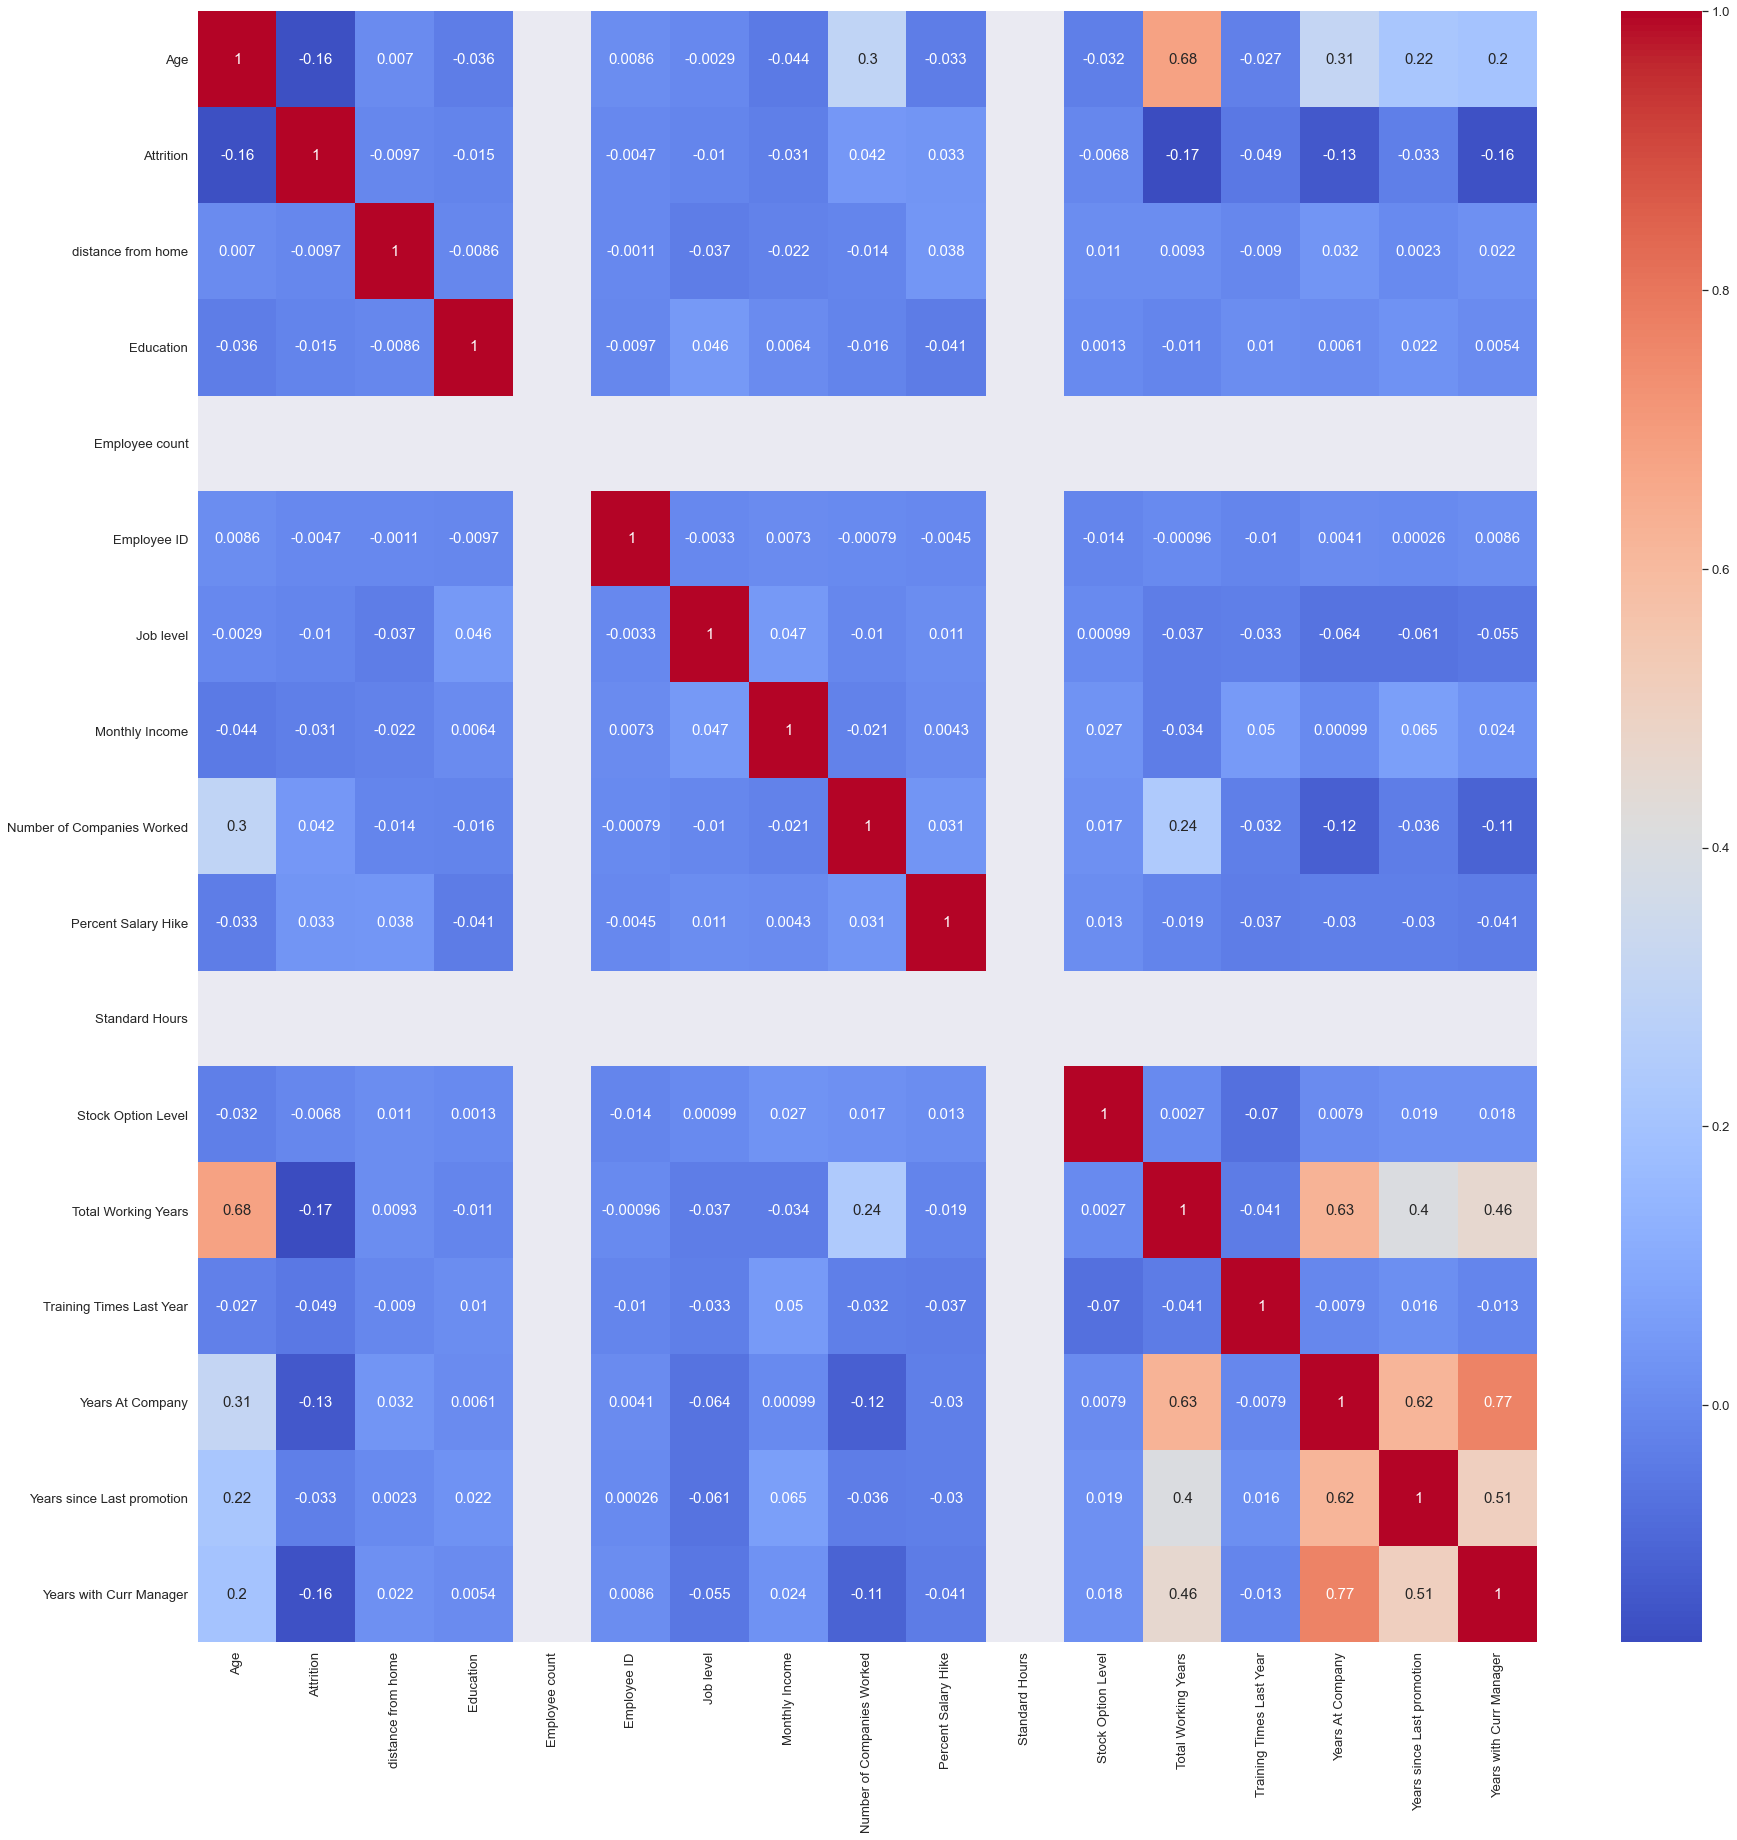

In [27]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})

#### Machine Learning¶
##### The end goal is to determine if an employee will leave the company or not. Therefore, this is a classification case. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

##### 1)Logistic Regression

##### 2)Decision Tree Classification

##### 3)Random Forest Classification

##### Following code converts columns from string values to integer values for purpose of fitting data in machine learning

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()

'''Identifying the columns with string'''
df_num = df.select_dtypes(exclude=[np.number])
lst=list(df_num.columns)

'''Converting those columns to integer values'''
for i in lst:
    df[i]=label_encoder_y.fit_transform(df[i])
df.head(10)



,Age,Attrition,Business Travel,Department,distance from home,Education,Education Field,Employee count,Employee ID,Gender,...,Number of Companies Worked,Over 18 years,Percent Salary Hike,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Years At Company,Years since Last promotion,Years with Curr Manager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4
5,46,0,2,1,8,3,1,1,6,0,...,3.0,0,13,8,0,28.0,5,7,7,7
6,28,1,2,1,11,2,3,1,7,1,...,2.0,0,20,8,1,5.0,2,0,0,0
7,29,0,2,1,18,3,1,1,8,1,...,2.0,0,22,8,3,10.0,2,0,0,0
8,31,0,2,1,1,3,1,1,9,1,...,0.0,0,21,8,0,10.0,2,9,7,8
9,25,0,0,1,7,4,3,1,10,0,...,1.0,0,13,8,1,6.0,2,6,1,5


In [29]:

y = df['Attrition']
X= df.drop('Attrition', axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=44)

In [30]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state = 44)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("The accuracy score is: ", format(accuracy_score(y_test,y_pred),".2f"))
print(" ")
print("Confusion matrix: ","\n",confusion_matrix(y_test,y_pred))

The accuracy score is:  0.85
 
Confusion matrix:  
 [[1483   10]
 [ 256   15]]
